In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Laden des Datensatzes

In [130]:
df = np.loadtxt("Oregon_housing_prices.txt",dtype=np.float64,delimiter=",")
data_x = df[:,0:1]*0.3048**2 #Feet to m^2
data_y = df[:,-1]

# Aufgabe 1

#### a) Visualisierung

Visualisieren Sie die Daten, indem Sie ein Streudiagramm in matplotlib zeichnen. Versehen Sie das Diagramm mit Achsenbeschriftungen und mit einem Titel

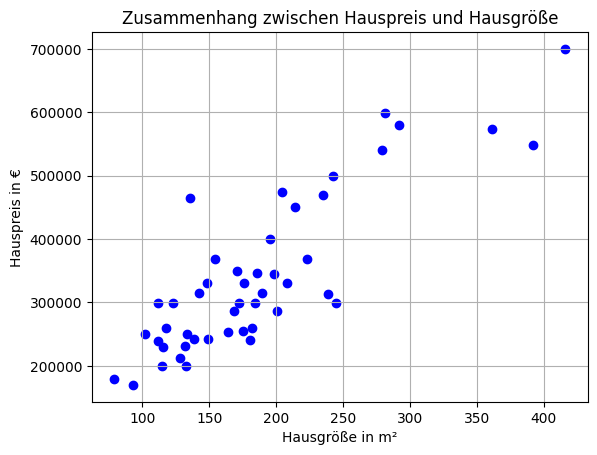

In [131]:
fig, ax = plt.subplots()
ax.scatter(data_x, data_y, c='blue')
plt.xlabel('Hausgröße in m²')
plt.ylabel('Hauspreis in €')
plt.title('Zusammenhang zwischen Hauspreis und Hausgröße')
ax.grid(True)
plt.show()

#### b) Lineare Regression mit scikit-learn

Trainieren Sie auf dem gesamten Datensatz ein lineares Regressionsmodell in scikit-learn.

In [132]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(data_x.reshape(-1,1), data_y)

LinearRegression()

#### c) Modell-Output

Welche Werte haben die gefitteten Parameter $\theta_0$ und $\theta_1$?

In [133]:
print("Theta0 = {}".format(regressor.intercept_))

Theta0 = 71270.49244872923


In [134]:
print("Theta1 = {}".format(regressor.coef_))

Theta1 = [1448.0181458]


#### d) Visualisierung des Modells

Erstellen Sie das Streudiagramm aus a) neu und zeichnen Sie nun auch die Regressionsgerade mit ein.

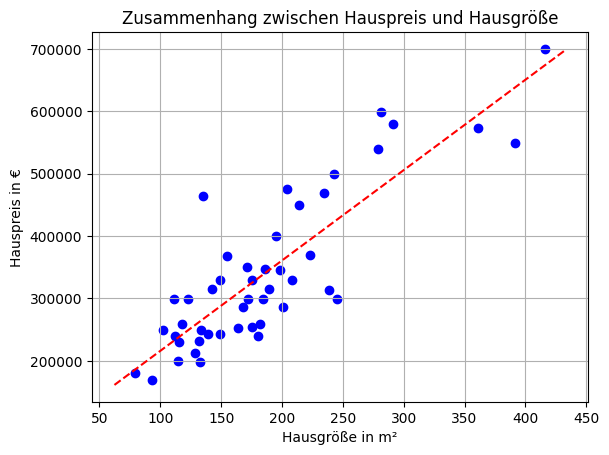

In [135]:
fig, ax = plt.subplots()
ax.scatter(data_x, data_y, c='blue')
x_vals = np.array(ax.get_xlim())
y_vals = regressor.intercept_ + regressor.coef_ * x_vals
plt.plot(x_vals, y_vals, '--', c='red')
plt.xlabel('Hausgröße in m²')
plt.ylabel('Hauspreis in €')
plt.title('Zusammenhang zwischen Hauspreis und Hausgröße')
ax.grid(True)
plt.show()

#### e) Einsatz des Modells zur Prognose

Welchen Hauspreis prognostiziert das Modell für ein Haus mit $100m^2$ Wohnfläche?

In [136]:
regressor.predict([[100]])

array([216072.30702901])

# Aufgabe 2: Lineare Regression durch Lösen der Normalgleichungen

#### a) Aufstellen der Matrix

Stellen Sie die Matrix $X$ (s. Folien) auf. Legen Sie dazu eine neue Matrix der Dimension $(m,2)$ an, die aus lauter 1en besteht und kopieren Sie data_x in die zweite Spalte

In [137]:
matrix_x = np.ones((data_x.__len__(), 2))
for i in range(len(data_x)):
    matrix_x[i][1] = data_x[i]



C:\Users\schmidtfa\AppData\Local\Temp\ipykernel_20020\3352588657.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  matrix_x[i][1] = data_x[i]


#### b) Aufstellen und Lösen der Normalgleichungen

Berechnen Sie $\theta_0$ und $\theta_1$ durch Lösen der Normalgleichungen. Hinweis: das Matrix-Matrix-Produkt $A\cdot B$   wird in numpy durch den Aufruf $A$@$B$ oder durch Aufruf der Funktion np.dot($A$,$B$) gebildet. Zum Lösen eines linearen Gleichungssystems kann die Funktion numpy.linalg.solve verwendet werden

In [138]:
theta = np.dot(np.linalg.inv(matrix_x.T@matrix_x), data_y@matrix_x)

In [139]:
print("Theta0 = {} \nTheta1 = {}".format(theta[0], theta[1]))

Theta0 = 71270.49244872922 
Theta1 = 1448.0181458027766


# Aufgabe 3: Gradientenverfahren

In dieser Aufgabe soll die Regressionsaufgabe mit Hilfe des Gradientenverfahrens gelöst werden, das zu implementieren ist.

#### a) Standardisierung

Erstellen Sie zwei numpy-Arrays data_x_std und data_y_std, die durch Standardisierung aus data_x bzw. data_y hervorgehen. Welchen Wert erwarten Sie für $\theta_0$, wenn ein univariates lineares Regressionsmodell auf den standardisierten Daten trainiert wird? Bilden Sie anschließend wieder die Matrix $X$ (s. Folien), indem Sie eine führende Spalte mit 1en zu data_x_std hinzufügen.

In [157]:
def standardize(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return (data - mean) / std_dev

data_x_std = standardize(data_x)
data_y_std = standardize(data_y)

lin_model = LinearRegression()
lin_model.fit(data_x_std, data_y_std)
theta_0 = lin_model.coef_
y_intercept = lin_model.intercept_
print(theta_0)
print(y_intercept)

one_column = np.ones(47)

matrix = np.insert(data_x_std, 0, one_column, axis=1)

[0.85498759]
-4.135176030792158e-16


#### b) Least Squares - Kostenfunktional

Vervollständigen Sie die folgende Funktion, die das Least-Squares-Kostenfunktional $J$ realisiert.

In [158]:
def cost(X, Y, theta = None):
    """
    This function implements the least squares cost function for univariate linear regression
    Parameters:
        X: m x 2 matrix containing 1s in the first column and the x values of the training samples in the second column
        Y: m x 1 matrix containing the target values of the training samples
        theta: 2 x 1 parameters of the cost function
        
    Returns: 
        value of cost function for a given theta
        
    """
    m = matrix.shape[0]
    ls_fact = 1 / (2 * m)
    sum = 0

    for i in range(m):
        sum += ((theta[0] + (theta[1] * X[i][1])) - Y[i])**2

    return ls_fact * sum

#### c) Gradientenverfahren

Implementieren Sie die folgende Funktion, die das Gradientenverfahren realisiert. Die Iteration soll abbrechen, wenn $\|update\|<1e-5$ gilt, oder wenn max_iter Iterationen durchgeführt wurden.

In [159]:
def gradientDescent(X, Y, theta, max_iter, alpha):
    """
    This function implements gradient descent for univariate linear regression.
    Parameters:
        X: m x 2 matrix containing 1 in the first column and the x values in the second column
        Y: m x 1 matrix containing the target values 
        theta: initial value for theta
        max_iter: max number of iterations to be carried out
        alpha: step size
    Returns: mx1 matrix containing the regression parameters resulting from the iteration
    """
    m = len(X[:,0])
    for i in range(max_iter):
        update = (alpha / m) * (X.T@X@theta - X.T@Y)
        theta = theta - update
        print(theta)
        if np.linalg.norm(update) < 1e-5:
            print("break it down")
            break

    return


#### d) Anwendung auf den standardisierten Häuserdatensatz

Wenden Sie das Gradientenverfahren auf den standardisierten Häuserdatensatz an, um die Koeffizienten $\theta_0$ und $\theta_1$ zu bestimmen. Verwenden Sie als Startwert den Nullvektor und die Parameter max_iter=50 sowie alpha=1.0

In [160]:
theta = np.zeros((2, 1))
matrix = np.ones((len(data_x), 2))
feature_col = np.array([data_x_std[:, 0]])
matrix[:,1] = feature_col
test = gradientDescent(matrix, data_y_std, theta, 50, 1.0)

[[-7.55896527e-17  8.54987593e-01]
 [-7.55896527e-17  8.54987593e-01]]
[[-7.55896527e-17  8.54987593e-01]
 [-7.55896527e-17  8.54987593e-01]]
break it down


#### e)  

Verwenden Sie das resultierende Modell, um den prognostizierten Preis für ein Haus mit $100m^2$ zu bestimmen. Transformieren Sie die Daten geeignet. Es sollte derselbe Zahlenwert wie bei Aufgabe 1e herauskommen (ca. 216.000 Euro).

In [161]:
theta0 = 8.54987593e-01
intercept = -7.55896527e-17

mean_x = 185.869333133617
std_x = 73.04061333719004

mean_y = 340412.6595744681
std_y = 123702.5360061474

trans = (100-mean_x) / std_x

pred = (theta0 * trans) + intercept
print((pred * std_y) + mean_y)

216072.30701128277
